<a href="https://colab.research.google.com/github/xander412/fmml-jan-/blob/main/Project_Lab_13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 13: 
#### Coordinator: Tanvi Kamble
---
# Project

---



1.   ***k-mer based***
            1.Principal Component Analysis
            2.t-SNE 
                * Observations from 1.1  are supported with respect to t-SNE 
                * 3 new Observations were made
2.   ***Mutation profile based***
            1.Principal Component Analysis
                * Intrepretation of 1.1 Observations
                    1. "NOT SUPPORTED"->Detailed reasoning with statistical results were given.
                    2. SUPPORTED
                    3. "NOT SUPPORTED DIRECTLY"-> Detailed reasoning with statstical results were given.
                * New Observations Made
                    1. 3rd observation in 1.1 is supported i.e. the cluster is forming a linear spread in the Mutation-PCA plot.
            2.t-SNE
                * t-SNE done
                    1. Used 6 perplexities
                    2. All the plots are presented
                * Intrepretation of 1.1 Observations
                    1. "PARTIALLY SUPPORTED"->Detailed reasoning with statistical results were given.
                    2. SUPPORTED
                    3. SUPPORTED
3. ***ISO-MAP***
            1. k-mer based
                * Intrepretation of 1.1 Observations wtih detailed plots
                    1. SUPPORTED.
                    2. SUPPORTED
                    3. SUPPORTED
            2. mutation based
                * Intrepretation of 1.1 Observations wtih detailed plots
                    1. NOT SUPPORTED.->Detailed reasoning with statistical results were given.
                    2. SUPPORTED
                    3. NOT SUPPORTED->Detailed reasoning with statistical results were given.
4. ***PCA on k-mer (3 components)***
            
            1.3d PCA-plot with  67% variance
            2.Segmented the main-Cluster and isolated the main-cluster in another plot
            3.ABNORMALITIES from every state is calculated and tabulated
            4.The respective plots are produced.
            5.Intrepretaion of 3 observations from 1.1
                * All the three observations are "very very strongly" supported by the "Spread Table" and the "PLOTS."
                * SUPPORTED->Detailed reasoning with statiscal resuls were given.

For the last 2 years we have been severely affected by the COVID-19 pandemic. And if you would know a little about it, you would have heard about **SARS-CoV-2** (Severe Acute Respiratory Syndrome Coronavirus 2) which is the virus responsible for the COVID-19 disease.

A little biology might intrigue you further. This SARS-CoV-2 is a RNA virus and when this virus enters your body, it interacts with the ACE-2 receptor using its Spike protein. When this happens, it gets access to be able to multiply inside your body, ultimately resulting in you getting infected with the COVID-19 disease.

Before I explain you the details of the project and what you will be doing, let me first introduce you to what a virus genome is. Every living organism in this world has someting called a Nucleus which produces its characteristic genome sequence. Even your body has a genome and it will be very different from that of lets say a cat. Now, this SARS-CoV-2 virus also has its characteristic genome sequence and it is roughly of the length 29000 bases. A little more Class 9 biology lesson: Each genome is built up with just 4 characters called bases (A, T, G and C).

For this project, I will provide you with some SARS-CoV-2 genomes collected from infected people in India and you will use just the Visualization techniques you learnt in the module to analyze the genomes and infer the spread of the COVID-19 disease in the country.

685 genome sequences from India downloaded from GISAID (https://www.gisaid.org/) in early to mid 2020 have been provided to you in the _sequences.fasta_ file and some cleaned metadata regarding these sequences has been given in the _INDIA_685.csv_ file. 

In [ ]:
from google.colab import files

In [ ]:
# Upload the INDIA_685.csv file here by running this cell

uploaded1 = files.upload()

Saving INDIA_685.csv to INDIA_685.csv


In [ ]:
# Upload the sequences.fasta file here by running this cell

uploaded2 = files.upload()

Saving sequences.fasta to sequences (1).fasta


KeyboardInterrupt: ignored

In [ ]:
!pip3 install biopython

     |████████████████████████████████| 2.3 MB 9.9 MB/s 


In [ ]:
import pandas as pd
import numpy as np
from Bio import SeqIO

In [ ]:
data = pd.read_csv("INDIA_685.csv")
data.tail()

,StrainID,Accession_ID,Location,State,Host,Gender,Patient age,Patient status,Collection_date,Originating lab,Authors,Nuc_muts
680,hCoV-19/India/nimh-2873/2020|EPI_ISL_436137|20...,EPI_ISL_436137,Asia / India / Karnataka,Karnataka,Human,Female,28,Asymptomatic,4/21/2020,District Surveillance Unit,"Chitra Pattabiraman, Vijayalakshmi Reddy, Hars...","['C1281T', 'C4158T', 'G11083T', 'C13730T', 'C2..."
681,hCoV-19/India/nimh-3952/2020|EPI_ISL_436138|20...,EPI_ISL_436138,Asia / India / Karnataka,Karnataka,Human,Male,38,Asymptomatic,4/23/2020,District Surveillance Unit,"Chitra Pattabiraman, Vijayalakshmi Reddy, Hars...","['C241T', 'C3037T', 'C3634T', 'A3742G', 'C1440..."
682,hCoV-19/India/nimh-3970/2020|EPI_ISL_436139|20...,EPI_ISL_436139,Asia / India / Karnataka,Karnataka,Human,Male,20,Symptomatic,4/23/2020,District Surveillance Unit,"Chitra Pattabiraman, Vijayalakshmi Reddy, Hars...","['C241T', 'C3037T', 'C3634T', 'A3742G', 'C1440..."
683,hCoV-19/India/nimh-4376/2020|EPI_ISL_436140|20...,EPI_ISL_436140,Asia / India / Karnataka,Karnataka,Human,Female,52,Asymptomatic,4/24/2020,District Surveillance Unit,"Chitra Pattabiraman, Vijayalakshmi Reddy, Hars...","['C241T', 'C3037T', 'C3634T', 'A3742G', 'C1440..."
684,hCoV-19/India/nimh-4378/2020|EPI_ISL_436141|20...,EPI_ISL_436141,Asia / India / Karnataka,Karnataka,Human,Female,27,Asymptomatic,4/24/2020,District Surveillance Unit,"Chitra Pattabiraman, Vijayalakshmi Reddy, Hars...","['C241T', 'C3037T', 'C3634T', 'A3742G', 'C1440..."


In [ ]:
fasta_sequences = SeqIO.parse(open("sequences.fasta"),'fasta')

counter = 0
for fasta in fasta_sequences:
    counter +=1
    
print("Number of sequences is:", counter)    

Number of sequences is: 685


You might have heard in the news that the SARS-CoV-2 is mutating and might have heard the words Double Mutant, Delta Variant and so on. These are nothing but very slight differences in the genomes caused due to Mutations. Some of these mutations end up making the virus deadlier or more infectious.

Our goal here is to analyze these genomes and find the ones closer to one another (similar mutations in both) or distant (different profile of mutations). These mutations in turn help us to understand the spread of the Virus and the Demographics of it. Imagine a sequence from Italy has the same set of 10 random mutations as a sequence in India. We can then infer that the source of infection for both the people could be the same. This sort of analysis helps us analyze hotspots and predict if a large outbreak is about to happen.

We will try to look at these genome sequences and be able to cluster similar ones together and distant ones furhter away. In this project you will be using two methods to do this:

**1. k-mer based methods** <br>
**2. Mutation Profile based methods**

# kmer based methods

In bioinformatics, k-mers are substrings of length k contained within a biological sequence. A sequence of length L will have ```L-k+1 k-mers``` and ```4^k total possible k-mers```. Here we, will be using kmers of size 7. We will represent each genome in this kmer space. Basically a genome of size 30000 bases would have a total of 29994 7-mers. 

**Now how do you use this information to cluster genome sequences?** <br>
We would be looking at the counts of different kmers in the genomes and the ones which have similar counts for different kmers should end up closer than the others.

For **k=7**, there are **16384** possible kmers. We will represent each genome sequence as a vector of size 16384 with each position scoring the frequency of the kmer corresponding to that position.

**But how do we find out the position in the array for a kmer?**<br>
We will be using a hash function to map each kmer to a position in the array (0 to 16383). Whenever that kmer will be observed in a sequence, the value at the corresponding position in the array would be increased by 1.

#### Hash function:

A: 0 <br>
G: 1<br>
T: 2<br>
C: 3<br>

Multiply the character value by ```4^(position of the character in the kmer)``` <br>
therefore, TAG would equal = (4^0 * 2) + (4^1 * 0) + (4^2 * 1) = 2 + 0 + 16 = 18

**Can you find out the hash value for CATCGAG?**

In [ ]:
def calc_score(examplesequence):

    position = 0
    score = 0
    value = 0
    flag = 0
    
    for base in examplesequence:

        if(base == "A" or base == "a"):
            value = 0
        elif(base == "G" or base == "g"):
            value = 1
        elif(base == "T" or base == "t"):
            value = 2
        elif(base == "C" or base == "c"):
            value = 3
        else:
            flag=1

        score += (4 ** position)* value
        position+=1

    return (flag,score)
    
calc_score("ATAGTAG")

(0, 4680)

In [ ]:
k=7
big_matrix = []
sequences_name = []

fasta_sequences = SeqIO.parse(open("sequences.fasta"),'fasta')

for fasta in fasta_sequences:
    
    embedding = np.zeros(4**k, dtype=int)
    sequence = str(fasta.seq)
    sequence_name = fasta.id
    sequences_name.append(sequence_name)

    for j in range(len(sequence)-k+1):
        kmer = sequence[j:j+k]
        flag,score = calc_score(kmer)
        if(flag!=1):
            embedding[score]+=1

    embedding = embedding.tolist()
    big_matrix.append(embedding)

In [ ]:
print("Number of sequences:", len(sequences_name))
print("Number of features for each sequence:", len(big_matrix[0]))

Number of sequences: 685
Number of features for each sequence: 16384


In [ ]:
len(big_matrix)

685

So essentially we reduced a **29000 base sequence** into a **vector of size 16384**. Now we need to further reduce the dimensionality to 2 or 3 dimensions to be able to visualize it. 

**But how dow we do that??**

We can use any of the methods taught to you in the Labs. But here I will explain how to do this using PCA. Then you will use the knowledge from Lab3 on t-SNE to do a similar analysis yourself.

### PCA

In [ ]:
from sklearn.decomposition import PCA

pca = PCA() # create a PCA object
pca.fit(big_matrix) # do the math
pca_data = pca.transform(big_matrix) # get PCA coordinates for the matrix

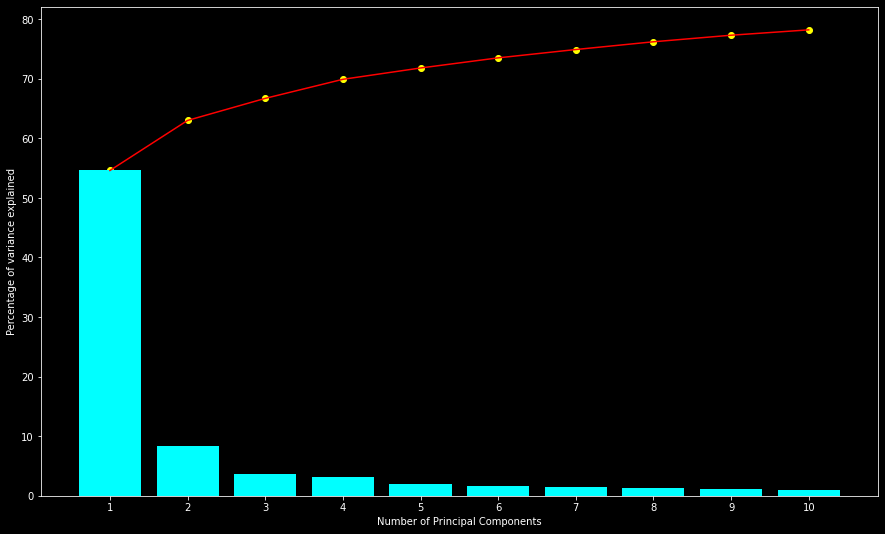

In [ ]:
import matplotlib.pyplot as plt

per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels_all = ['PC'+str(x) for x in range(1, len(per_var)+1)]
per_var=per_var[:10]
labels = [str(x) for x in range(1, len(per_var)+1)]

with plt.style.context('dark_background'):
    plt.figure(figsize = (15, 9))
    plt.xlabel("Number of Principal Components")
    plt.ylabel("Percentage of variance explained")
    plt.bar(range(1,len(per_var)+1), per_var, tick_label=labels, color = "aqua")
    plt.plot(range(1,len(per_var)+1), np.cumsum(per_var), color = "red")
    plt.scatter(range(1,len(per_var)+1), np.cumsum(per_var), color = "yellow")

In [ ]:
(pca.explained_variance_ratio_*100)[:3].sum()

66.70110329151093

In [ ]:
per_var.cumsum()

array([54.6, 63. , 66.7, 69.9, 71.8, 73.5, 74.9, 76.2, 77.3, 78.2])

As you can see, the first principal component alone explains more than 50% of the variance in the dataset. To put this into context, more than **50% variance in 685 genomes of size 29000 bases could be explained with just one dimension**. This shows the amount of structure present in the dataset.

We will be now visualizing the first 2 principal components and plot the genomes according to the State they belonged to.

In [ ]:
final_df = pd.DataFrame(columns=["StrainID", "PC1", "PC2", "PC3", "State"])
pca_df = pd.DataFrame(pca_data, index=[*sequences_name], columns = labels_all)

for sample in pca_df.index:
    
    dicti = dict()
    
    dicti["StrainID"] = sample
    dicti["PC1"] = pca_df.PC1.loc[sample]
    dicti["PC2"] = pca_df.PC2.loc[sample]
    dicti["PC3"] = pca_df.PC3.loc[sample]
    dicti["State"] = data[data["StrainID"]==sample]["State"].tolist()[0]
    
    final_df = final_df.append(dicti, ignore_index = True)

final_df.head()

,StrainID,PC1,PC2,PC3,State
0,hCoV-19/India/763/2020|EPI_ISL_420543|2020-03-03,-4.326235,-3.484139,-1.786329,Stateless
1,hCoV-19/India/770/2020|EPI_ISL_420545|2020-03-03,-4.234399,-3.509996,-1.804263,Stateless
2,hCoV-19/India/772/2020|EPI_ISL_420547|2020-03-03,-4.184090,-3.754896,-1.696688,Stateless
3,hCoV-19/India/773/2020|EPI_ISL_420549|2020-03-03,-4.194559,-3.531680,-1.895380,Stateless
4,hCoV-19/India/777/2020|EPI_ISL_420551|2020-03-03,-4.186462,-3.550434,-1.888697,Stateless


In [ ]:
import plotly.graph_objects as go
import plotly.express as px

In [ ]:
for_x = final_df.PC1.tolist()
for_y = final_df.PC2.tolist()
for_states = final_df.State.tolist()
for_hover = final_df.StrainID.tolist()

fig = px.scatter(x=for_x, y=for_y, color=for_states, title="Principal Component Axis",
                color_discrete_map={
                "Stateless": "grey",
                "Tamil Nadu": "green",
                "Telangana": "red",
                "Maharashtra": "orange",
                "Gujarat": "magenta",
                "Delhi": "purple",
                "West Bengal": "aqua",
                "Haryana": "pink",
                "Odisha": "blue",
                "Madhya Pradesh": "brown",
                "Karnataka": "black"
                })

fig.show(renderer = "colab")

Even though the plot looks densely clustered, there are still a lot of obvious observations that you should be able to make.

### The first one, is that for some reason the Blue dots (Odisha) are scattered away from the big main cluster.

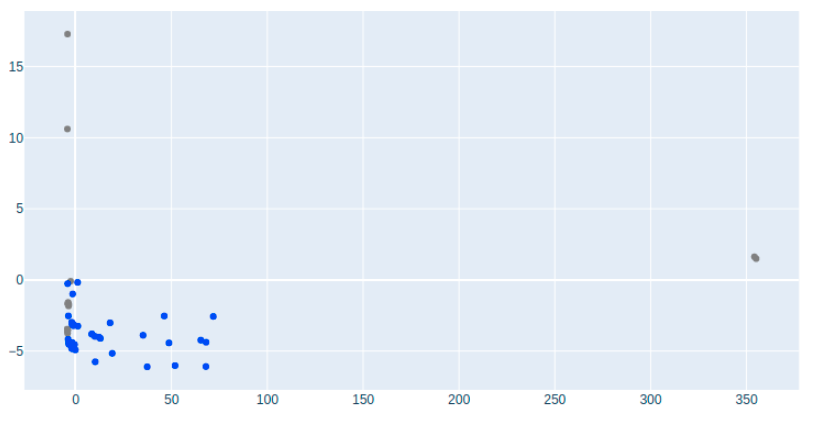

### Also, we can observe a secondary cluster away from the primary cluster. On inspecting, we can see that the sequences forming this cluster are primarily from Telangana (red), Delhi (magenta), and Tamil Nadu (green).

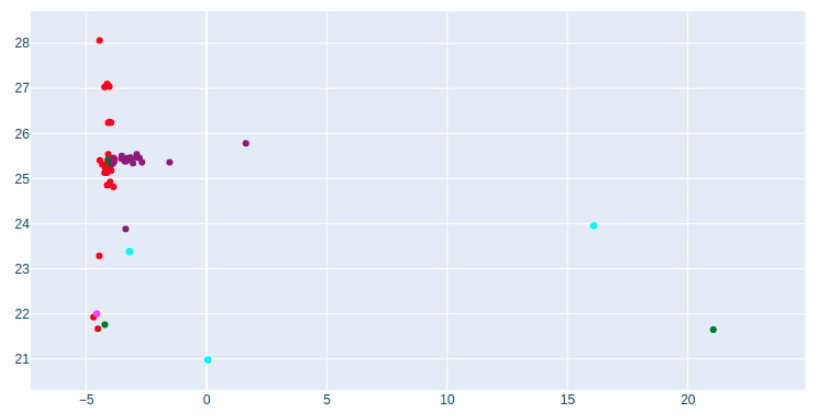

### The third less obvious observation is that within the main cluster, there is a dense cluster of sequences from Gujarat.

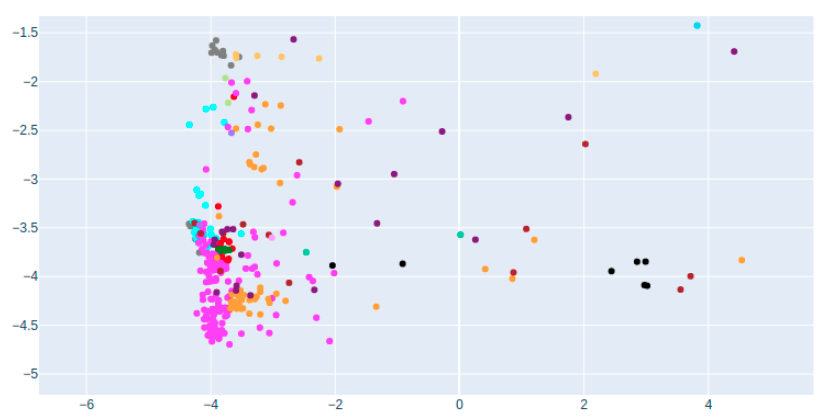

## t-SNE

In [ ]:
from sklearn.manifold import TSNE

# Use these parameters
random_state = 0
n_components = 2
perplexity = 30
n_iter = 10000

####### Enter code below ####### 

model = TSNE(n_components=2, random_state=random_state, perplexity=perplexity, n_iter=n_iter)
tsne_data = model.fit_transform(big_matrix)

################################

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



In [ ]:
tsne_data.shape

(685, 2)

In [ ]:
final_df_tsne = pd.DataFrame(columns=["StrainID", "X", "Y", "State"])
pca_df = pd.DataFrame(pca_data, index=[*sequences_name], columns = labels_all)

i = 0
for sample in pca_df.index:
    
    dicti = dict()
    
    dicti["StrainID"] = sample
    dicti["X"] = tsne_data[i][0]
    dicti["Y"] = tsne_data[i][1]
    dicti["State"] = data[data["StrainID"]==sample]["State"].tolist()[0]
    
    final_df_tsne = final_df_tsne.append(dicti, ignore_index = True)
    i+=1

final_df_tsne.tail()

,StrainID,X,Y,State
680,hCoV-19/India/MaxCov0046_CSIR-IGIB/2020|EPI_IS...,1.881189,11.271591,Delhi
681,hCoV-19/India/MaxCov0047_CSIR-IGIB/2020|EPI_IS...,1.828764,11.692644,Delhi
682,hCoV-19/India/MaxCov0048_CSIR-IGIB/2020|EPI_IS...,1.750070,12.592662,Delhi
683,hCoV-19/India/MaxCov0049_CSIR-IGIB/2020|EPI_IS...,1.364001,12.977669,Delhi
684,hCoV-19/India/MaxCov0050_CSIR-IGIB/2020|EPI_IS...,2.358655,10.985281,Delhi


In [ ]:
for_x = final_df_tsne.X.tolist()
for_y = final_df_tsne.Y.tolist()
for_states = final_df_tsne.State.tolist()
for_hover = final_df_tsne.StrainID.tolist()

fig = px.scatter(x=for_x, y=for_y, color=for_states, title="t-SNE", height=600, width=1000,
                color_discrete_map={
                "Stateless": "grey",
                "Tamil Nadu": "green",
                "Telangana": "red",
                "Maharashtra": "orange",
                "Gujarat": "magenta",
                "Delhi": "purple",
                "West Bengal": "aqua",
                "Haryana": "pink",
                "Odisha": "blue",
                "Madhya Pradesh": "brown",
                "Karnataka": "black"})

fig.show(renderer = 'colab')

You should get a plot similar to this:

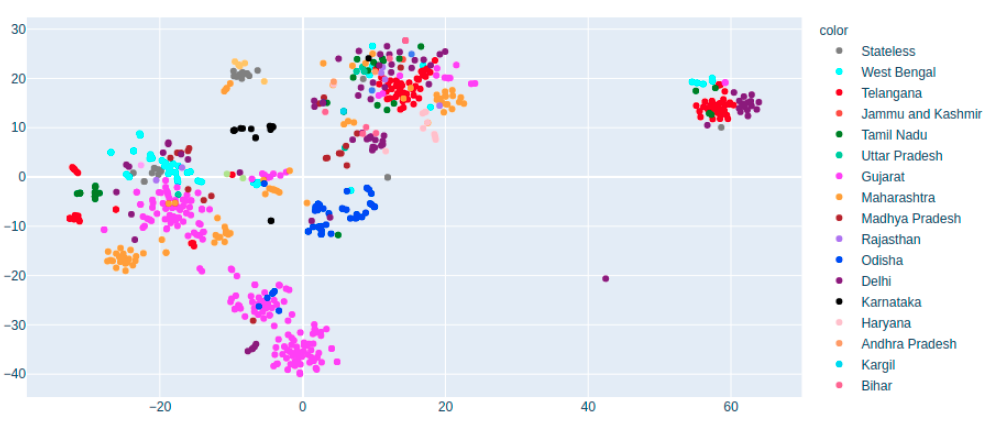

**Does making the 3 observations become easier in this plot? 
Can you make any other new observations from this plot?**

Make sure you tweak the parameters to find out if a certain different setting is allowing you to get a more interpretable plot.

###Yeah, its somewhat easier to make the same observations in tSNE graph.However, its showing some other clusters which we didn't noticed in PCA.
####***Observations Made:***
***1.Clusters of Gujarat are more clear in this graph and also it has three significant clusters and a small cluster that is a part of the main-cluster***

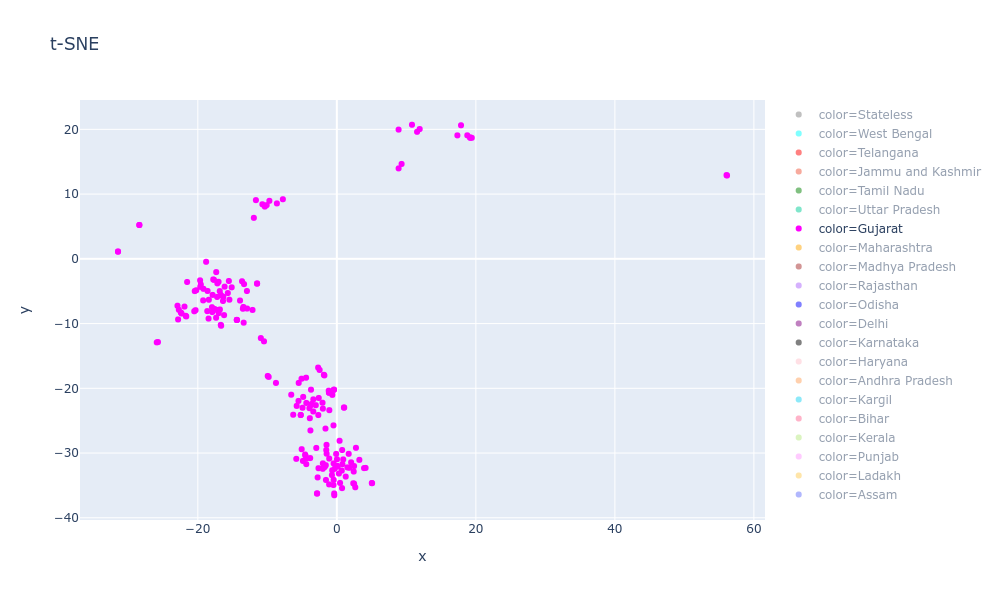

***2. We can see two clusters of Maharastra and a thin spread connecting them.***
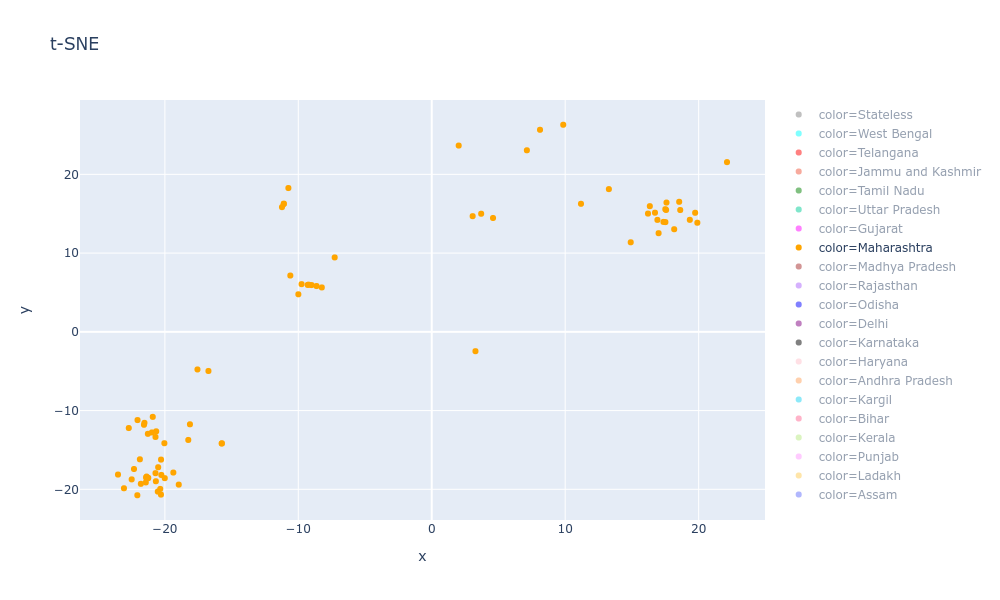


***3.Even if Odisha has an abnormal spread here in this plot, it is not involved in big main cluster as in PCA.***
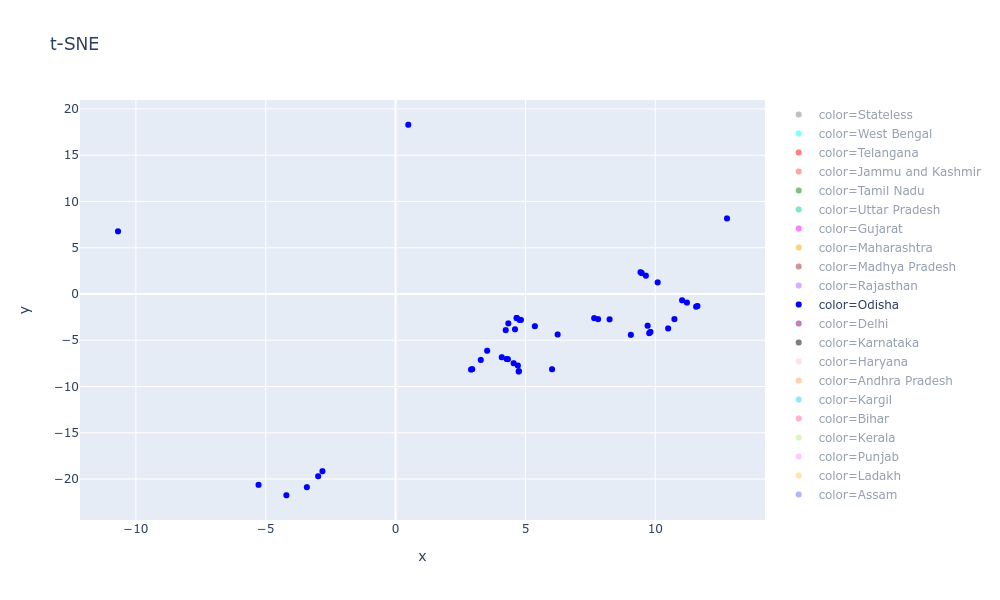

# Mutation Profile based methods

If you would have noticed, there is a column called Nuc_muts (Nucleotide mutations) in the INDIA_685.csv file. These are the specific mutations for each sequence which I have precomputed for you using the first SARS-CoV-2 sequence from Wuhan, China (https://www.ncbi.nlm.nih.gov/nuccore/NC_045512.2?report=fasta) as the reference.

A mutation C453T in a sequence means that the original reference sequence from Wuhan had a C at position 453 whereas the sequence has a T at that position. 

Now instead of using kmers for sequences, this time we will use the **presence/absence of all mutations** found in our dataset to represent the genomes.

In [ ]:
## First we need to get the list of all unique mutations observed in our dataset.

mutations = []
for i in range(len(data)):

    sample_muts = data["Nuc_muts"][i][1:][:-1].split(",")

    for j in sample_muts:
        mut = j.strip()[1:][:-1]
        if(len(mut)>=2):
            if(mut not in mutations):
                mutations.append(mut)

print(len(mutations))

1279


:So there are 1279 unique mutations in our sequences. We can now represent each genome as a ```vector of size 1279 where each position indicates the presence (1) or absence (0) of a specific mutation```.

In [ ]:
samplelist = data["StrainID"].tolist()
df = pd.DataFrame(columns = [*samplelist])
df = df.replace(np.nan,0)

for mutation in mutations:

    dicti = dict(zip(samplelist, np.zeros(len(samplelist), dtype=int)))

    for i in range(len(data)):
        flag=0
        strainid = data["StrainID"][i]
        sample_muts = data["Nuc_muts"][i][1:][:-1].split(",")

        for j in sample_muts:
            mut = j.strip()[1:][:-1]
            if(len(mut)>=2):
                if(mut == mutation):
                    flag = 1
                    break

        dicti[strainid]=flag  

    df = df.append(dicti, ignore_index = True)
    
df = df.T

df.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1239,1240,1241,1242,1243,1244,1245,1246,1247,1248,1249,1250,1251,1252,1253,1254,1255,1256,1257,1258,1259,1260,1261,1262,1263,1264,1265,1266,1267,1268,1269,1270,1271,1272,1273,1274,1275,1276,1277,1278
hCoV-19/India/nimh-2873/2020|EPI_ISL_436137|2020-04-21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
hCoV-19/India/nimh-3952/2020|EPI_ISL_436138|2020-04-23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0
hCoV-19/India/nimh-3970/2020|EPI_ISL_436139|2020-04-23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1
hCoV-19/India/nimh-4376/2020|EPI_ISL_436140|2020-04-24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
hCoV-19/India/nimh-4378/2020|EPI_ISL_436141|2020-04-24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0


## PCA

Performing PCA on this dataframe, we want to reduce the dimensionality of our genome sequences from 1279 to 2.

In [ ]:
pca = PCA()
pca.fit(df)
pca_data = pca.transform(df)

In [ ]:
df.shape

(685, 1279)

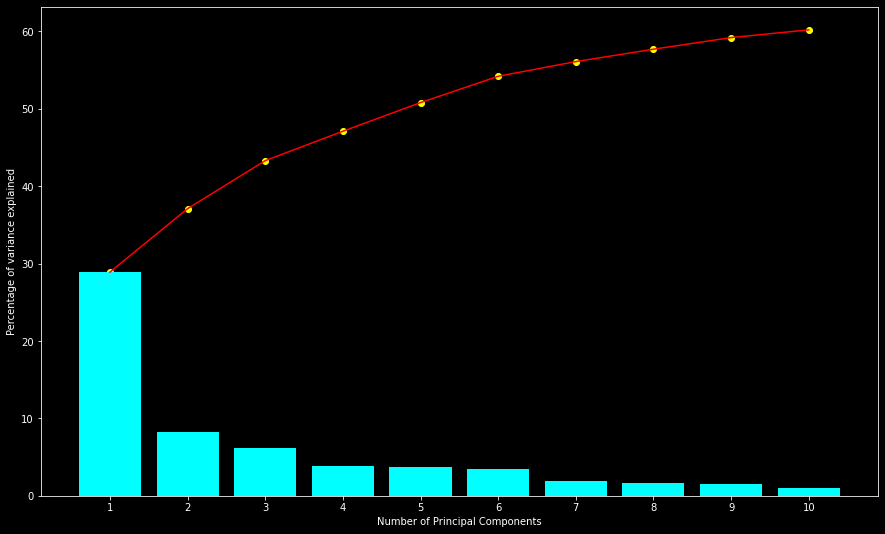

In [ ]:
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels_all = ['PC'+str(x) for x in range(1, len(per_var)+1)]
per_var=per_var[:10]
labels = [str(x) for x in range(1, len(per_var)+1)]

with plt.style.context('dark_background'):
    plt.figure(figsize = (15, 9))
    plt.xlabel("Number of Principal Components")
    plt.ylabel("Percentage of variance explained")
    plt.bar(range(1,len(per_var)+1), per_var, tick_label=labels, color = "aqua")
    plt.plot(range(1,len(per_var)+1), np.cumsum(per_var), color = "red")
    plt.scatter(range(1,len(per_var)+1), np.cumsum(per_var), color = "yellow")

The first principal component should be able to capture close to 30% of the variance in the dataset.

In [ ]:
final_df1 = pd.DataFrame(columns=["StrainID", "PC1", "PC2", "State"])
pca_df1 = pd.DataFrame(pca_data, index=[*samplelist], columns = labels_all)

for sample in pca_df1.index:
    
    dicti = dict()
    
    dicti["StrainID"] = sample
    dicti["PC1"] = pca_df1.PC1.loc[sample]
    dicti["PC2"] = pca_df1.PC2.loc[sample]
    dicti["State"] = data[data["StrainID"]==sample]["State"].tolist()[0]
    
    final_df1 = final_df1.append(dicti, ignore_index = True)

final_df1.tail()

,StrainID,PC1,PC2,State
680,hCoV-19/India/nimh-2873/2020|EPI_ISL_436137|20...,1.530221,0.079550,Karnataka
681,hCoV-19/India/nimh-3952/2020|EPI_ISL_436138|20...,-1.063943,-0.405022,Karnataka
682,hCoV-19/India/nimh-3970/2020|EPI_ISL_436139|20...,-1.058232,-0.410670,Karnataka
683,hCoV-19/India/nimh-4376/2020|EPI_ISL_436140|20...,-1.057465,-0.409620,Karnataka
684,hCoV-19/India/nimh-4378/2020|EPI_ISL_436141|20...,-1.057465,-0.409620,Karnataka


In [ ]:
for_x = final_df1.PC1.tolist()
for_y = final_df1.PC2.tolist()
for_states = final_df1.State.tolist()
for_hover = final_df1.StrainID.tolist()

fig = px.scatter(x=for_x, y=for_y, color=for_states, height=600, width=1200,
                 title="Principal Component Axis",
                color_discrete_map={
                "Stateless": "grey",
                "Tamil Nadu": "green",
                "Telangana": "red",
                "Maharashtra": "orange",
                "Gujarat": "magenta",
                "Delhi": "purple",
                "West Bengal": "aqua",
                "Haryana": "pink",
                "Odisha": "blue",
                "Madhya Pradesh": "brown",
                "Karnataka": "black"})
fig.show(renderer = 'colab')

You should get a plot like this:

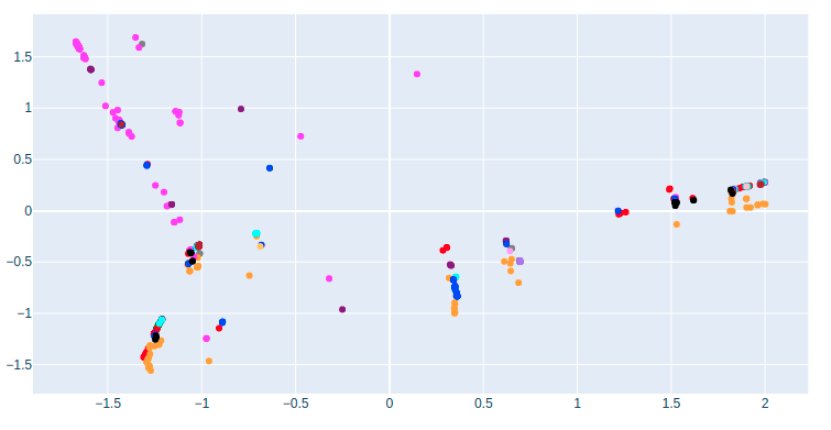

**This makes the above observations so much easier. Can you list them with respect to this plot?**

 **1.**This plot is ***not confidently supporting the First observation***.The figure given below is an ***isolation of "Odisha"*** from the whole PCA plot.It is clear that ***it is not scattered away from any main-cluster***.Because there is ***no big perfect cluster in this PCA plot to start with***. Even if we consider the less significant ***right-most or the left-bottom clusters in the main-plot,"samples from Odisha are not scattered abnormally from these clusters"*** as we saw in the k-mers PCA plot.

**Formal Reasoning Supporting the argument:** Computation of clustering and spread of samples from Odisha are done for PCA of k-mers and Mutation based approaches.

**K-Mer PCA:**In the k-mer PCA plot ***significantly 80 %*** of the samples are clustered and then the remaining ***20 %*** is spread abnormally.

**Mutation Profile PCA:**In the Mutation PCA plot, ***an insignificant 34.7 %*** of the samples are clustered in the mid-plot and remianing ***65.3 %*** of the samples are spread similar to the other states.

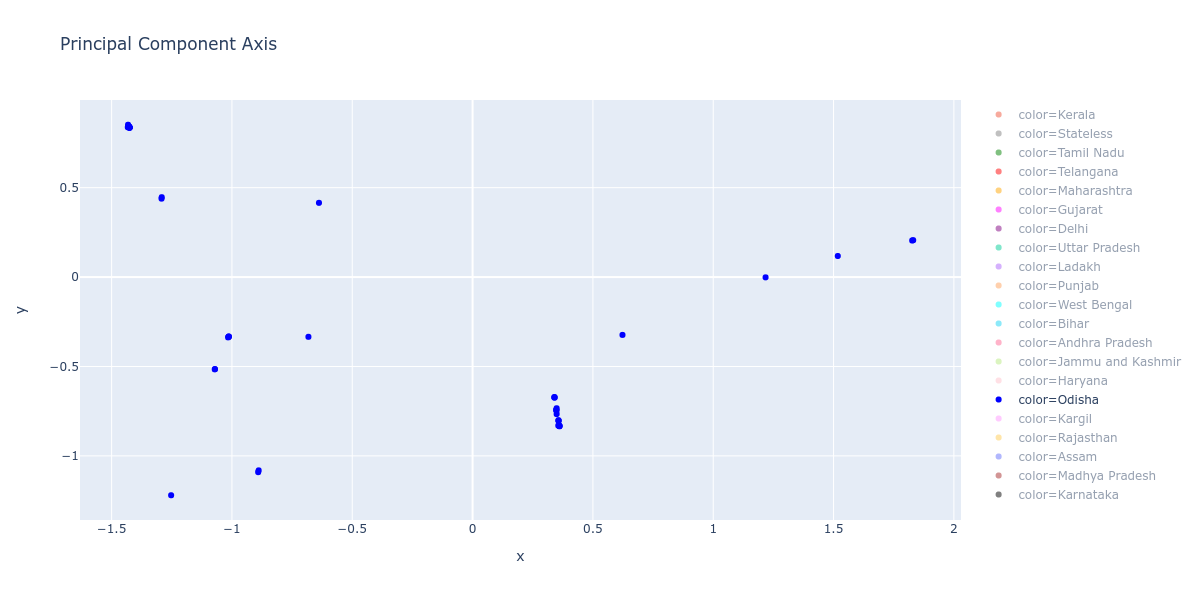

In [ ]:
# Computation
x = final_df['PC1'] < 25
y = final_df['PC2'] < 44
z = final_df['State'] == 'Odisha'
odishaDf = final_df[x & y & z]
x = final_df1['PC1'] < 0.5
y = final_df1['PC1'] > 0
z = final_df1['State'] == 'Odisha'
odishaDf1 = final_df1[x & y & z]
print(odishaDf.shape[0]/(final_df['State'] == 'Odisha').sum() * 100,
odishaDf1.shape[0]/(final_df1['State'] == 'Odisha').sum() * 100)

80.43478260869566 34.78260869565217


**2.**This plot ***confidently supports the 2nd observation***, .i.e. Telangana, Delhi, TamilNadu are forming secondary clusters in this PCA-plot.The ***right-most and left bottom clusters mentioned earlier are infact the clusters formed from these states.*** The below plot isolates these clusters so that it can be easy to view.
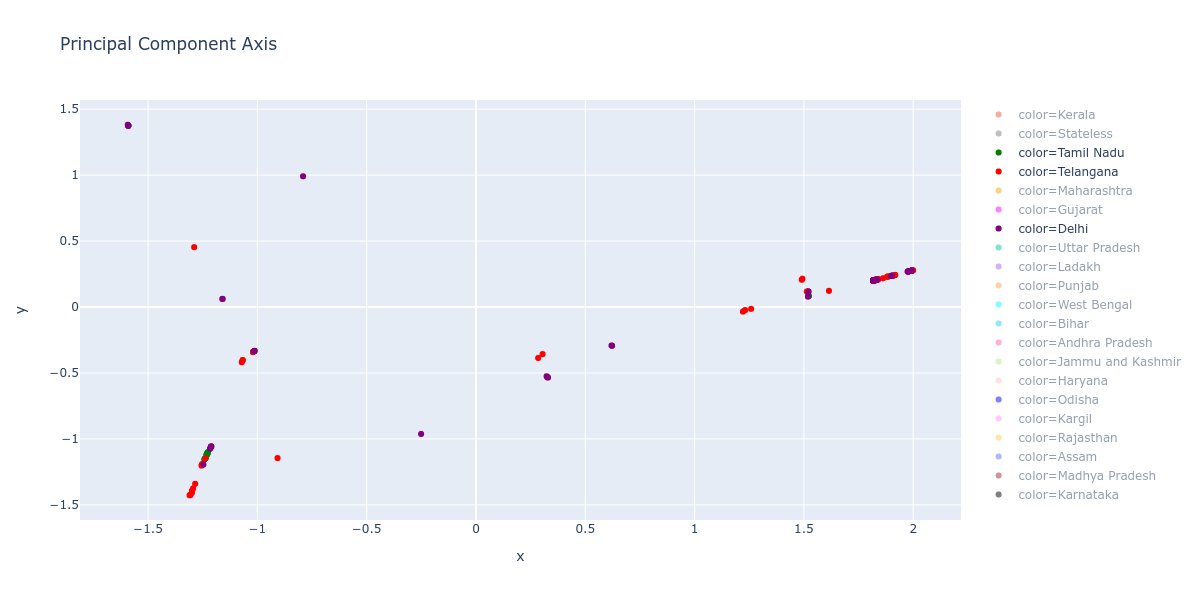

3. The third observation is ***not at all supported by this Mutation-PCA plot as the samples of Gujarat are not forming a dense cluster anywhere instead spread over the 2nd principle component.*** But there is a ***huge linear trend*** in ***85%*** of the sample points of Gujarat.
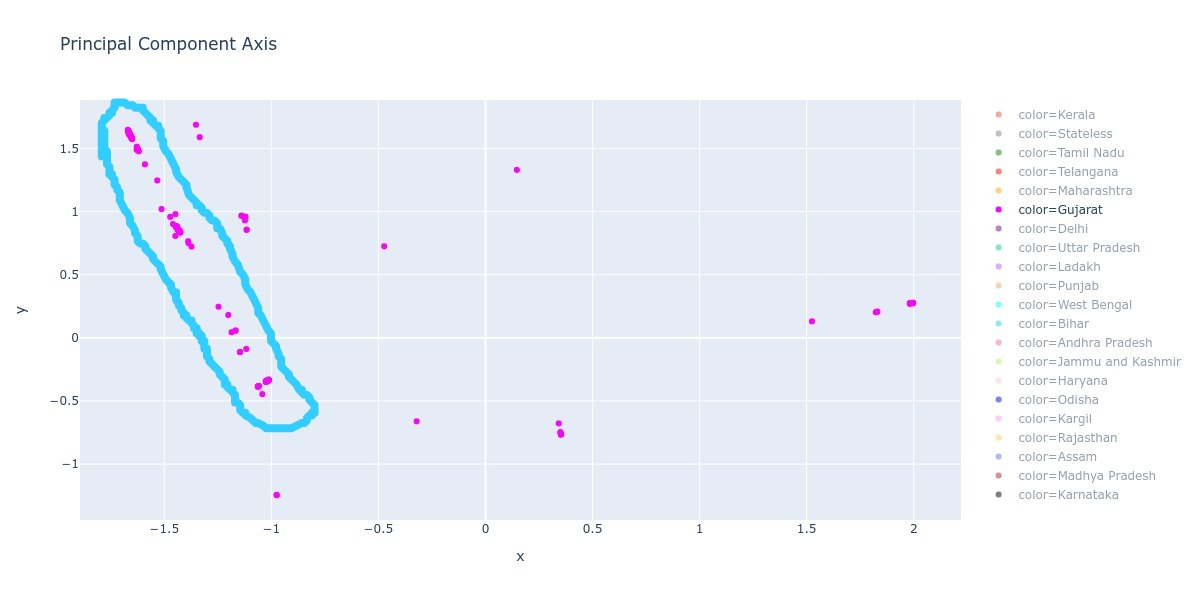

##***Observations Made:***
####***1.tSNE Linear Spread==PCA dense Cluster(Gujarat)***
Observation: ***The Linear spread points observed in tSNE by Gujarat are the identical points to that are forming cluster in PCA by Gujarat.***


As I said earlier **Gujarat is not forming any clusters in tSNE** plot, but there is a bunch of **points spread in linear fashion.**

####***Formal Reasoning supporting the observation:***
Let 𝑨 be the set of points making the cluster in PCA-plot

Let 𝑩 be the set of points making the linear spread in the tSNE-plot

It is found that

                 𝒏(𝑨) ~ 𝒏(𝑩)
                 𝑨 Ω 𝑩 = 𝑨

We have found that ***167 points(83 % of 201)*** are making the cluster in PCA. And ***171 points(85 % of 201)*** are making the linear spread in the tSNE.So the ***the amount of data falling in these two regions are equal. from Gujarat.***

***It is found that almost all(165) points making cluster(PCA) are  making the linear spread in tSNE too. These two sets have same StrainIDs.***

In [ ]:
# Computation
x = final_df['PC1'] < -3
y = final_df['PC2'] < -3
z = final_df['State'] == 'Gujarat'
gujDf = final_df[x & y & z]
x = final_df1['PC1'] < -1
z = final_df1['State'] == 'Gujarat'
gujDf1 = final_df1[x & z]
print(gujDf.shape[0]/(final_df['State'] == 'Gujarat').sum() * 100,
(gujDf1.shape[0] - 7)/(final_df['State'] == 'Gujarat').sum() * 100)
print(gujDf.shape[0],gujDf1.shape[0] - 7, (final_df['State'] == 'Gujarat').sum())

83.08457711442786 85.07462686567165
167 171 201


In [ ]:
# Intersection between k-mer linear spread and t-SNE cluster
np.intersect1d(gujDf['StrainID'], gujDf1['StrainID']).shape

(165,)


# t-SNE

Now this time you will be expected to write more than just 3 lines of the code to get the t-SNE plot for this data. Make sure you play with the **perplexity** values enough to appreciate the algorithm. I hope you are able to retrieve the 3 observations and make some new ones from the plot.

---

You are encouraged to also implement **ISOMAP (from Lab-4)** and try to get more insights from the plots.

In [ ]:
random_state = 123456
n_components = 2
perplexity = 15
n_iter = 15000
tsne_data_list = []
####### Enter code below ####### 
perx_vals = [15,30, 50, 75, 80, 100]
for x in perx_vals:
    model = TSNE(n_components=2, random_state=random_state, perplexity = x, n_iter=n_iter)
    tsne_data1 = model.fit_transform(df)
    tsne_data_list.append(tsne_data1)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.

/usr/local/li

In [ ]:
count = 0
for tsne_data1 in tsne_data_list:
    final_df_tsne1 = pd.DataFrame(columns=["StrainID", "X", "Y", "State"])
    final_df_tsne1['X'] = tsne_data1[:,0]
    final_df_tsne1['Y'] = tsne_data1[:,1]
    final_df_tsne1['StrainID'] = final_df1['StrainID']
    final_df_tsne1['State'] = final_df1['State']
    final_df_tsne1.tail()



    for_x = final_df_tsne1.X.tolist()
    for_y = final_df_tsne1.Y.tolist()
    for_states = final_df_tsne1.State.tolist()
    for_hover = final_df_tsne1.StrainID.tolist()

    fig = px.scatter(x=for_x, y=for_y, color=for_states, height=600, width=1200,
                 title=f"TSNE-{perx_vals[count]}",
                color_discrete_map={
                "Stateless": "grey",
                "Tamil Nadu": "green",
                "Telangana": "red",
                "Maharashtra": "orange",
                "Gujarat": "magenta",
                "Delhi": "purple",
                "West Bengal": "aqua",
                "Haryana": "pink",
                "Odisha": "blue",
                "Madhya Pradesh": "brown",
                "Karnataka": "black"})
    count += 1

    fig.show(renderer = 'colab')

1.The samples from Odisha are having a spread from one cluster to the other. And its somewhat supporting the first observation. But the ***spread of Odisha is not abnormal as many other states sampling are spreading in the same direction.*** Below given the isolated Odisha-plot.
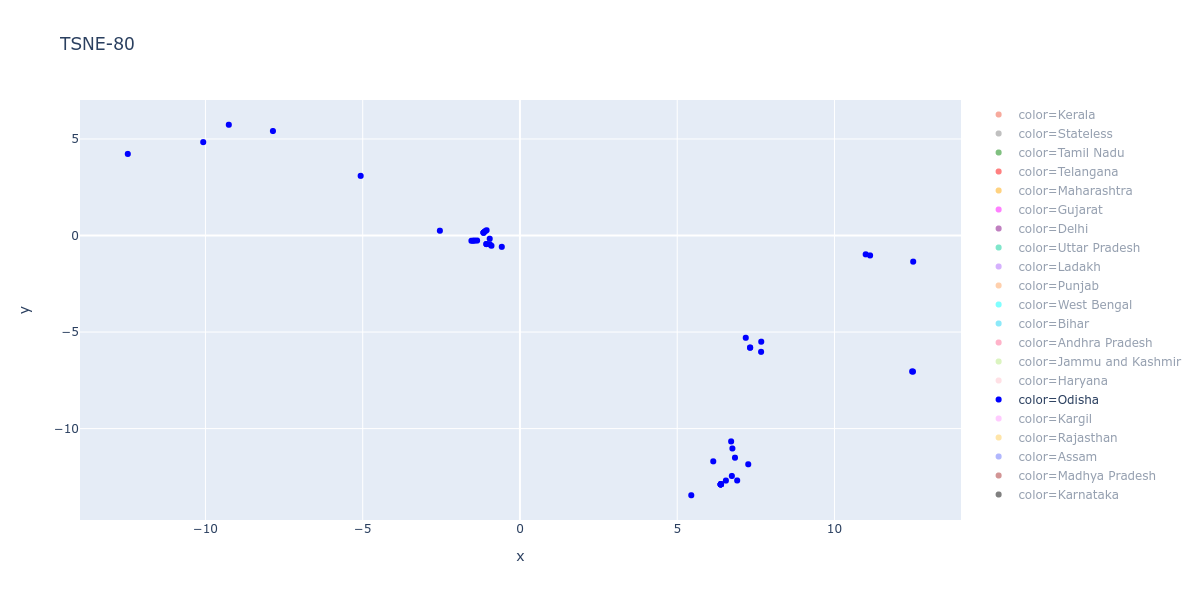

2. ***Telagana, Tamil Nadu and Delhi are making common clusters***. This can be clearly seen in the below plot.
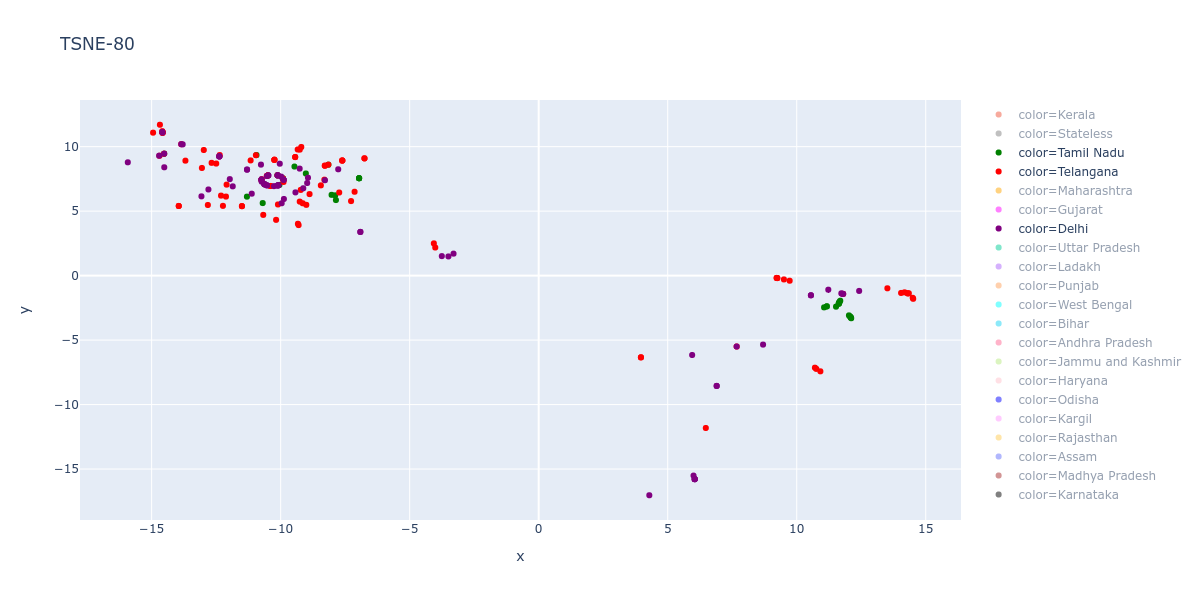

3.***Gujarat is forming a dense cluster.***So the plot is supporting the previous observations.
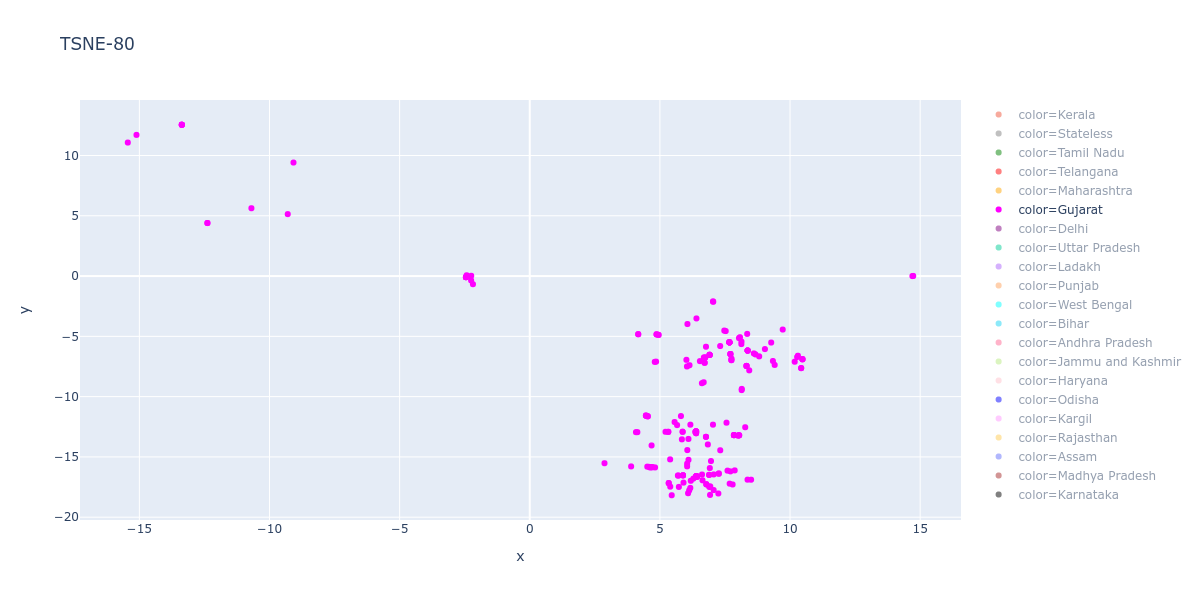

In [ ]:
tsne_data[:, 0].size

685

# ***ISOMAP***

###***Based on k-mer approach***

---



In [ ]:
from sklearn.manifold import Isomap

In [ ]:
pca_df

(685, 2)

In [ ]:
Y = Isomap(n_neighbors=15, n_components=2).fit_transform(big_matrix)

fig = px.scatter(x=Y[:, 0], y=Y[:, 1], color=final_df['State'], height=600, width=1200,
                 title="ISOMAP on k-mer based method",
                color_discrete_map={
                "Stateless": "grey",
                "Tamil Nadu": "green",
                "Telangana": "red",
                "Maharashtra": "orange",
                "Gujarat": "magenta",
                "Delhi": "purple",
                "West Bengal": "aqua",
                "Haryana": "pink",
                "Odisha": "blue",
                "Madhya Pradesh": "brown",
                "Karnataka": "black"})
fig.show(renderer = 'colab')

#### ***Intrepretation of the 3 observations from 1.1***
1.Odisha is indeed going away from the main-cluster making **abnormal spreads** from the other points. It can be clearly seen in the below graph. 
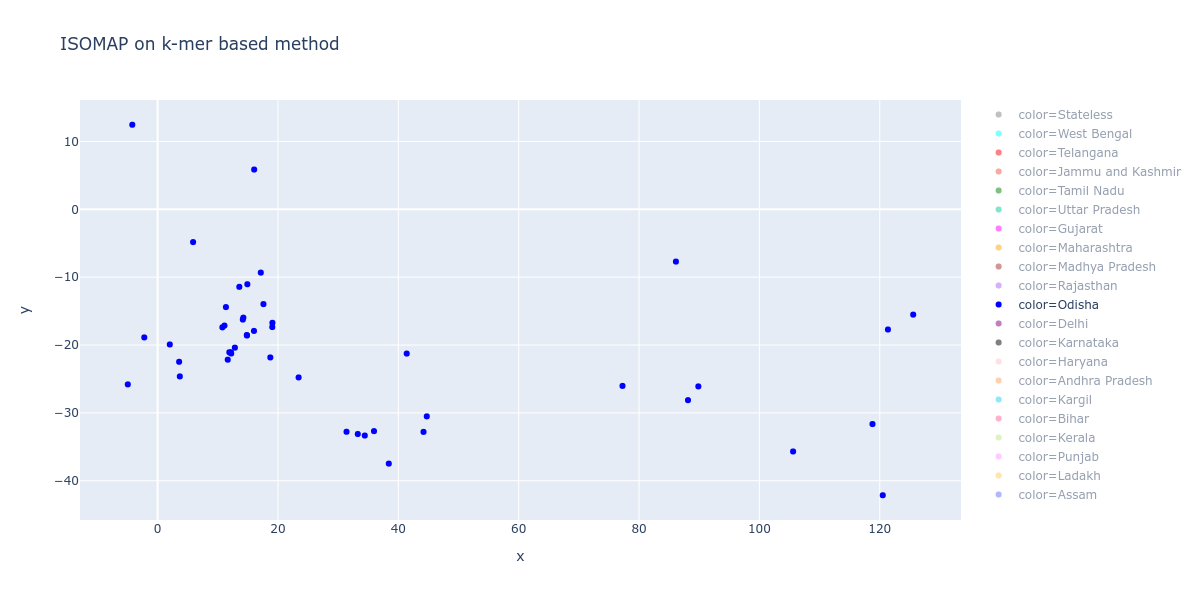

2. Telangana, Tamil Nadu and Delhi are ***making primary and secondary cluster as you can in the below graph.***
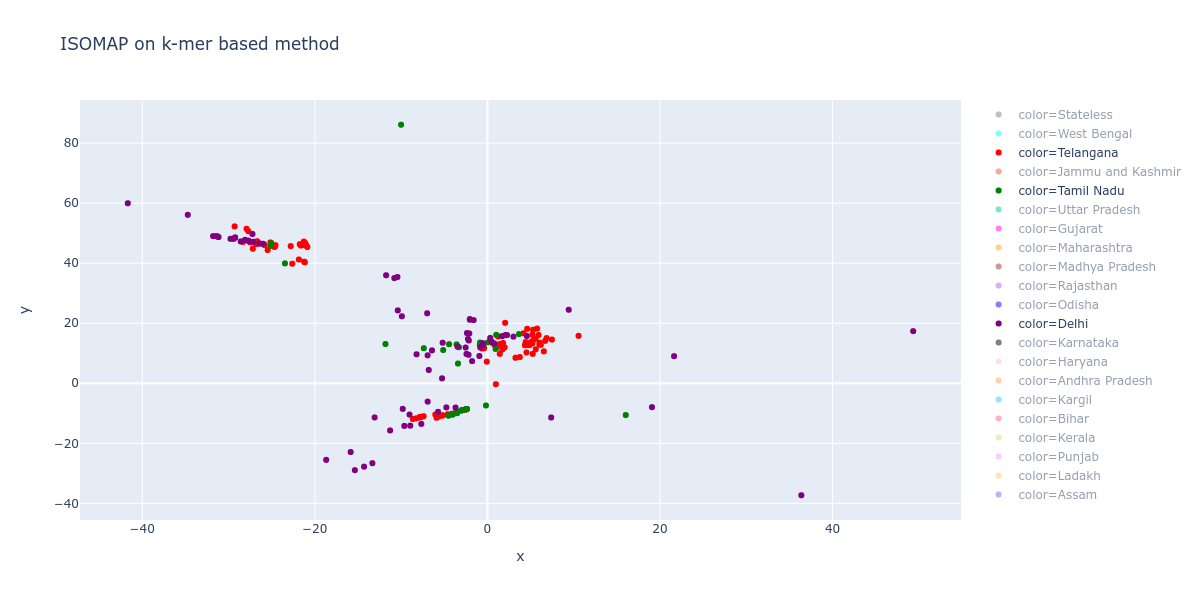

3. ***Gujarat is forming a dense cluster as shown below.***
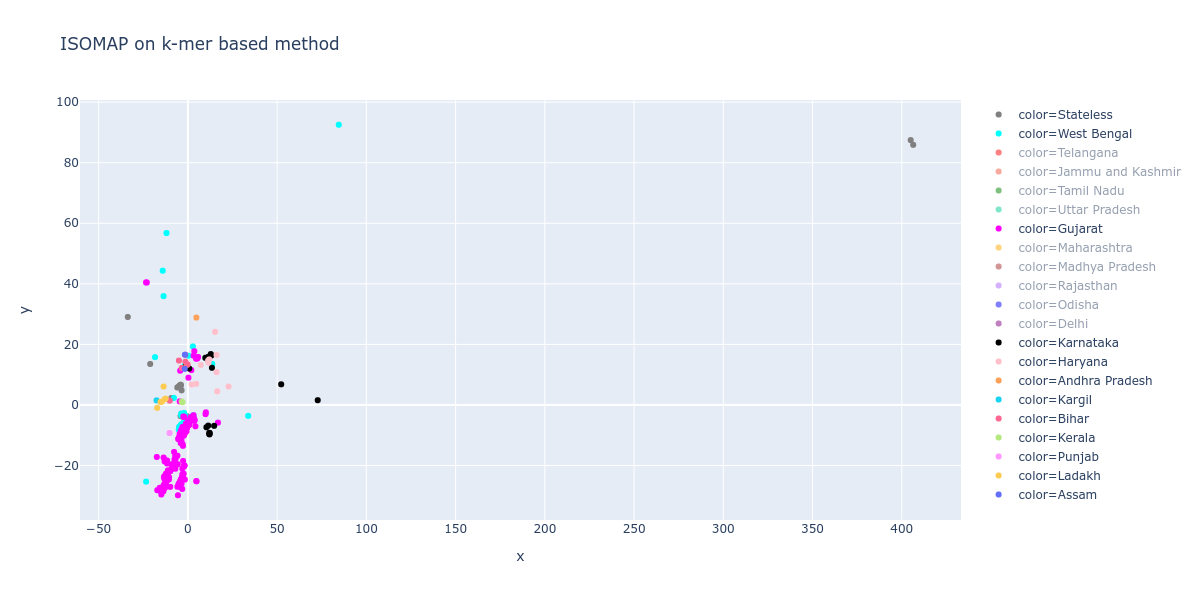

###***Based on Mutation Profiles***

In [ ]:
Y1 = Isomap(n_neighbors=50, n_components=2).fit_transform(df)


fig = px.scatter(x=Y1[:, 0], y=Y1[:, 1], color=final_df['State'], height=600, width=1200,
                 title="ISOMAP on mutation based method",
                color_discrete_map={
                "Stateless": "grey",
                "Tamil Nadu": "green",
                "Telangana": "red",
                "Maharashtra": "orange",
                "Gujarat": "magenta",
                "Delhi": "purple",
                "West Bengal": "aqua",
                "Haryana": "pink",
                "Odisha": "blue",
                "Madhya Pradesh": "brown",
                "Karnataka": "black"})
fig.show(renderer = 'colab')

####***Intrepretation of the 3 observations from 1.1***
1. ***Not supported.***
Reason:Odisha is having the spread, but the spread is simlar and the other states follows it.
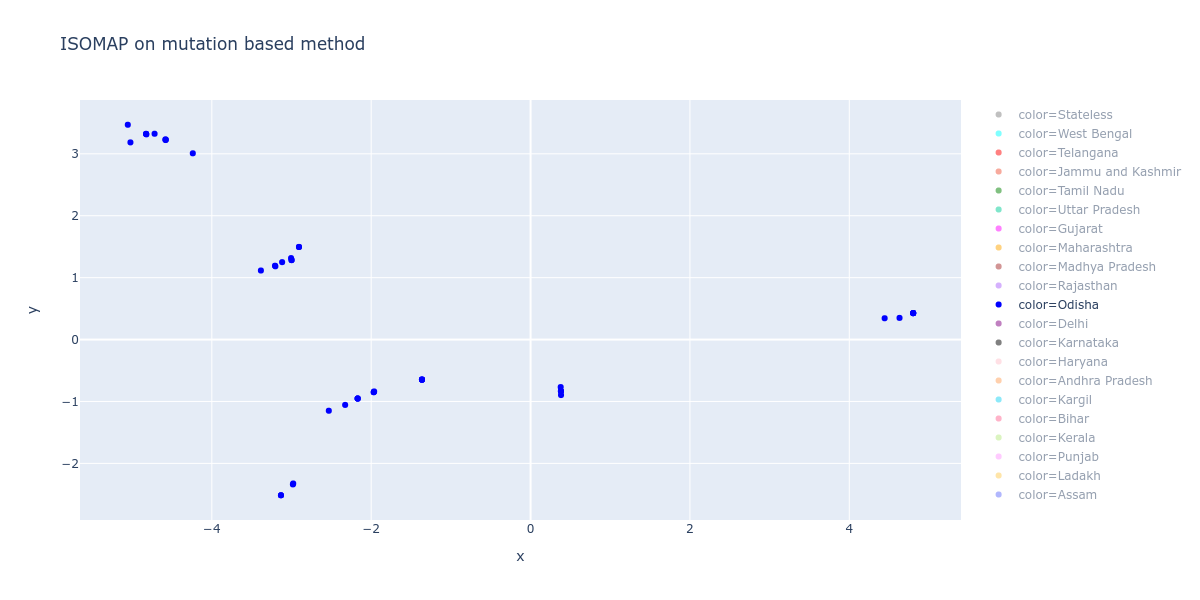


***2.Supported.***

Reason: TamilNadu, Telagana and Delhi are forming theirs clusters collectively as you can see in in the below graph.
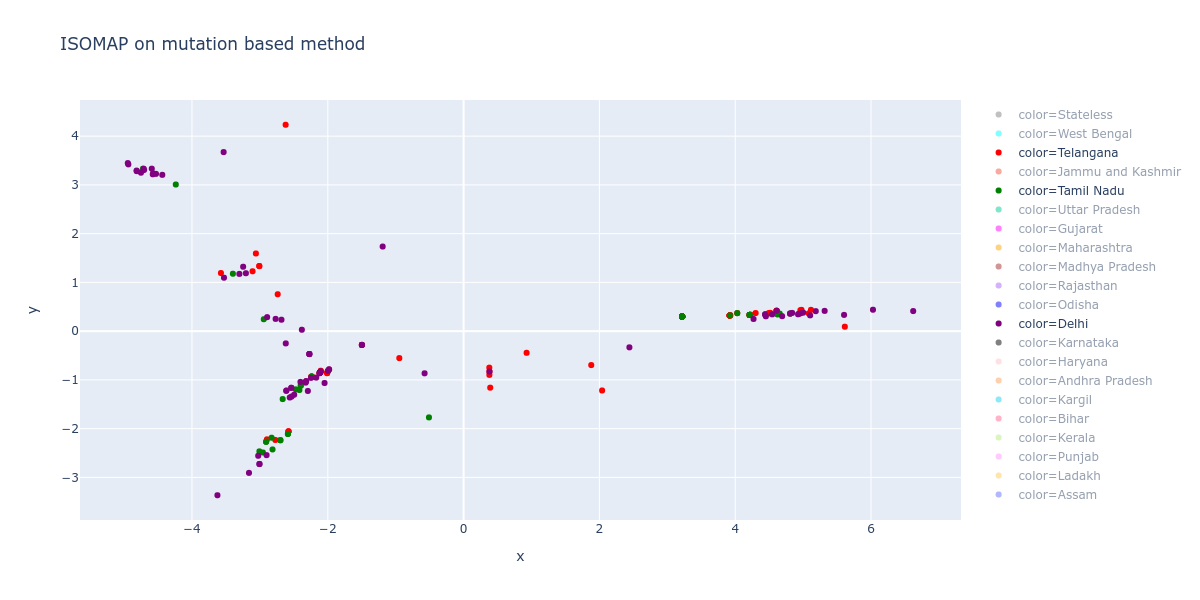

***3.Not supported.***

Reason: Gujarat is indeed forming clusters, but they are ***not as dense in 1.1 PCA. Maybe the linear spreads corresponds to the cluster.***
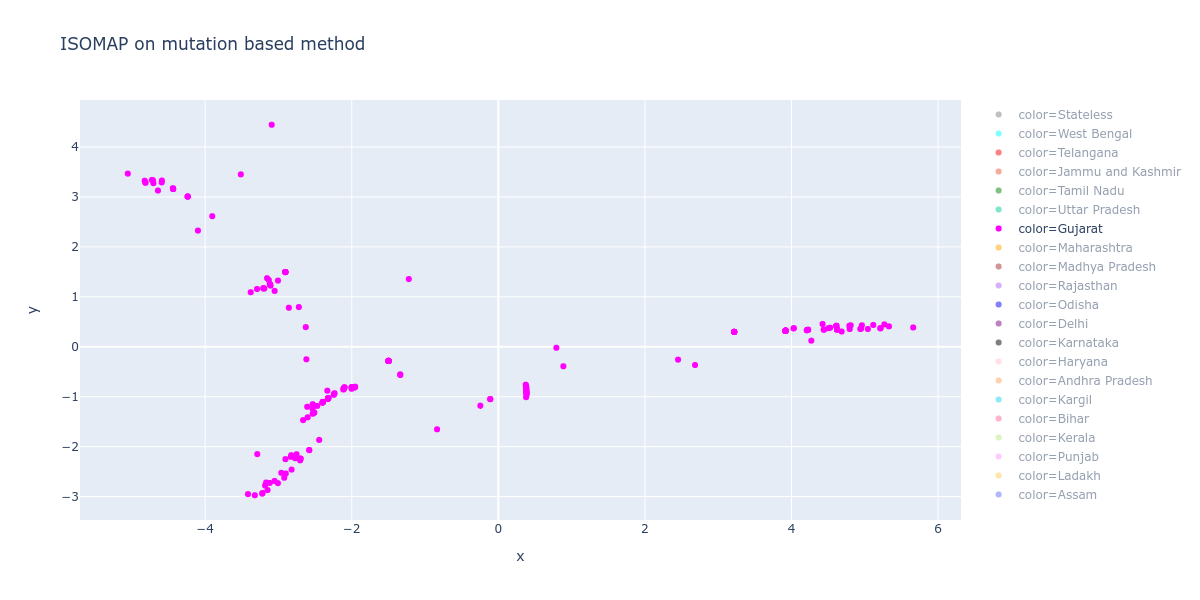


# Conclusion

You might be wondering how these 3 observations help in understanding the demographic spread of the virus in the country. 

### This is not a Bioinformatics course, so you may choose to ignore the details mentioned below
But the idea was to motivate you to understand the importance of visualization techniques even with no domain knowlege.

---
---

On performing genetic analysis on the sequences to understand why exactly these observations could have been happening I found the following:

#### Observation 1: 
Samples from Odisha are different than the rest of the country, hence they were scattered away from the clusters in the plots.

#### Reason: 
Genomic sequences of isolates from Odisha were shorter in length with missing bases (deletions); 1 - 29 bases in 5' UTR (38 isolates), 23842 - 24400 bases in S gene, 26306-26524 bases in E gene, 27527 – 28033 bases in ORF7b and ORF8 (8 samples), 28462 - 28680 bases in the N gene (10 samples), 29000 – 29685 in ORF10 gene (15 samples), and 29686 - 29903 bases in 3' UTR (39 isolates). These deletions were unique to the state and werent observed in samples from the rest of the country. 

#### Observation 2: 
A secondary cluster away from the primary cluster with sequences from Telangana, Delhi, and Tamil Nadu.

#### Reason: 
About one-third of the Indian isolates (219/685) are part of a subclade I/A3i defined by the co-occurring mutations C6312A, C13730T, C23929T, and C28311T. The subclade's predominance is observed in Telangana (69/97, 71%), Delhi (52/76, 68%), and Tamil Nadu (16/34). Analysis of this subclade is important both scientifically and epidemiologically as the mutations defining it are found in 32% of the Indian samples sequenced, while outside India its distribution is very low (3.5%). This clearly hints at early community transmission due to some super spreader event during March-April, as it is highly unlikely that around one-third of the samples sharing the same set of mutations could have arisen by multiple independent entries with international travel history, especially when its presence globally is negligibly small.

#### Observation 3:
A dense cluster of sequences from Gujarat.

#### Reason:
Isolates from Gujarat are a part of a subclade, I/GJ-20A defined by a shared set of mutations C18877T, G25563T (ORF3a: Q57H), and C26735T. This set of mutations are not well represented in the rest of the country. Mutations present in Gujarat have also been found in samples from Europe and that could have been the possible route of transmission into India. Also, Gujarat has the highest COVID-19 death rate (5.12%) in the country (Avg: 2.67%), and this death rate in Gujarat is comparable to that in Europe. This high fatality could be due to these characteristic mutations increasing the deleteriousness of the virus.

---

**So I hope you appreciate the valuable insights visualization techniques provide us with.** 

Best of luck for the next Module......
---

### First I did PCA for in k-mers approach considering **67 %** of the variance .i.e. the first 3 principal components.

In [ ]:
for_x = final_df.PC1.tolist()
for_y = final_df.PC2.tolist()
for_z = final_df.PC3.tolist()
for_states = final_df.State.tolist()
for_hover = final_df.StrainID.tolist()

fig = px.scatter_3d(final_df, x='PC1', y='PC2', z='PC3', color=for_states, title="Principal Component Axis",
                color_discrete_map={
                "Stateless": "grey",
                "Tamil Nadu": "green",
                "Telangana": "red",
                "Maharashtra": "orange",
                "Gujarat": "magenta",
                "Delhi": "purple",
                "West Bengal": "aqua",
                "Haryana": "pink",
                "Odisha": "blue",
                "Madhya Pradesh": "brown",
                "Karnataka": "black"
                })

fig.show(renderer = "colab")

### I am trying to find the number of samples in the **"big Main cluster"**.
### And then visualize the main cluster.
### From the above graph we can infer that the cluster is between
***PC1 < 69***

***PC2 < 3.6*** 

***PC3 < 11***

In [ ]:
filter1 = final_df['PC1'] < 69
filter2 = final_df['PC2'] < 3.6
filter3 = final_df['PC3'] < 11
mFilter = filter1 & filter2 & filter3
mainCluster = final_df[mFilter]


In [ ]:
px.scatter_3d(mainCluster, x = 'PC1', y = 'PC2', z = 'PC3', color=mainCluster['State'], title="Main Cluster",
                color_discrete_map={
                "Stateless": "grey",
                "Tamil Nadu": "green",
                "Telangana": "red",
                "Maharashtra": "orange",
                "Gujarat": "magenta",
                "Delhi": "purple",
                "West Bengal": "aqua",
                "Haryana": "pink",
                "Odisha": "blue",
                "Madhya Pradesh": "brown",
                "Karnataka": "black"
                })

In [ ]:
# Percentage of samples away from the cluster
perc = (mainCluster.shape[0] / final_df.shape[0]) * 100
print(perc)

87.44525547445255


In [ ]:
clusterSpreadTable = pd.DataFrame(columns = ['State','Percentage in cluster'])
spreadArray = np.array([(mainCluster['State'].value_counts()[x] / final_df['State'].value_counts()[x]) * 100 for x in final_df['State'].unique()])
clusterSpreadTable['State'] = final_df['State'].unique()
clusterSpreadTable['Percentage in cluster'] = spreadArray

In [ ]:
clusterSpreadTable.sort_values(['Percentage in cluster'])

,State,Percentage in cluster
10,Odisha,65.217391
2,Telangana,65.979381
11,Delhi,73.684211
0,Stateless,85.185185
4,Tamil Nadu,85.294118
1,West Bengal,86.666667
6,Gujarat,99.004975
18,Punjab,100.000000
17,Kerala,100.000000
16,Bihar,100.000000


####Intrepretation of 1.1 observations
1. ***SUPPORTED. In the table Odisha is having the most spread out of all the states.***
2. ***SUPPORTED. In the table Telangan, TamilNadu and Delhi are sequenced one by one which explains the their secondary clusters.***
3. ***SUPPORTED. Gujarat is having a positive 99% spread in the main-cluster.***

In [ ]:
def plotStateClusterSpread(state):
    odishaSpread = final_df[final_df['State'] == state][['PC1', 'PC2', 'PC3']].copy()
    filter1 = odishaSpread['PC1'] < 69
    filter2 = odishaSpread['PC2'] < 3.6
    filter3 = odishaSpread['PC3'] < 11
    odishaSpread['SpreadFlag'] = 0
    odishaSpread['SpreadFlag'] = (filter1 & filter2 & filter3).astype(np.int8)
    fig = px.scatter_3d(odishaSpread, x='PC1', y='PC2', z='PC3', 
                        color=odishaSpread['SpreadFlag'], title=f"{state} Spread",
                    color_discrete_map={1:'green', 0:'red'})

    fig.show(renderer = "colab")

In [ ]:
lis = ['Odisha','Telangana','Delhi','Stateless','Tamil Nadu','West Bengal']
for x in lis:
    plotStateClusterSpread(x)
# Scroll to view all the graphs